### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
## 커널 서포트벡터 머신 (2)

- 유방암 데이터에 커널 SVM 을 적용해 보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

In [2]:
malignant = cancer.data[cancer.target==0] # 37%
benign = cancer.data[cancer.target==1]    # 63%

malignant.shape, benign.shape

((212, 30), (357, 30))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

model = SVC()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

1.0

0.5804195804195804

In [4]:
pred_y = model.predict(X_test)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- 위의 결과를 보면, 테스트세트에 대한 점수가 60% 를 잘 넘지 못합니다.
- 모든 데이터를 양성이라고 판단하더라도 최소한 63% 는 맞출수 있습니다.
- 문제의 원인은 유방암 데이터의 스케일이 아주 차이가 크기 때문입니다.

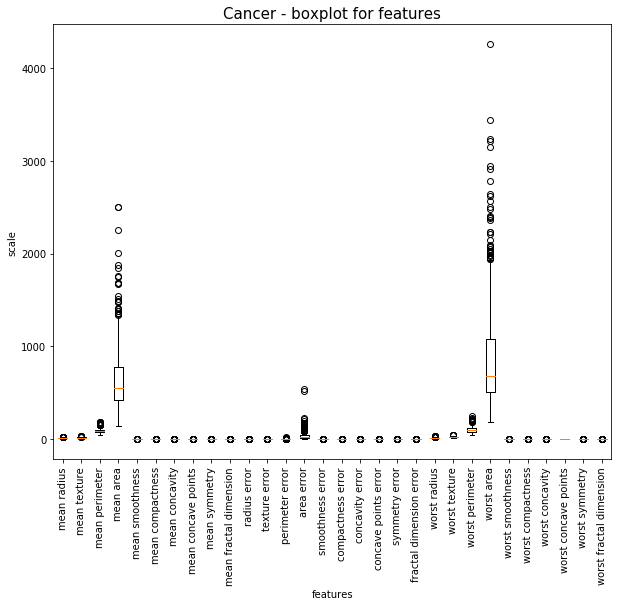

In [5]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - boxplot for features',fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)
plt.xlabel('features')
plt.ylabel('scale')
print('')

- 커널 SVM 은 스케일에 아주 민감합니다. 많은 차원과 큰 차원의 다항식, 복잡한 곡선함수를 사용하기 때문에 조금만 스케일이 차이가 나도 훈련데이터에 과대적합 되어 버립니다.
- <font color="red">커널 SVM 을 적용할 때는 반드시 **정규화(normalization)**을 해 주어야 합니다.</font>
- 머신러닝 알고리즘 중에서 **거리(distance)** 를 사용하는 함수는 반드시 정규화를 해 주어야 한다고 알아두면 좋습니다.
    1. k-NN 은 점들 사이의 거리에 기반하므로 정규화가 반드시 필요합니다.<br>
    2. 선형회귀와 로지스틱회귀는 높이값을 비교하므로 정규화가 꼭 필요한 것은 아니지만, 적용하면 좋습니다.<br>
    3. 선형 SVM 도 직선과 점들 사이의 거리를 사용하기 때문에 정규화가 꼭 필요합니다.

- 정규화의 방법은 대표적으로 2가지 방법을 사용합니다.
    1. 0과 1사이의 값으로 균등하게 비율을 조정하는 방법
    2. 평균 0, 표준편차 1의 정규분포로 변환하는 방법
- 데이터의 특성에 맞게 적당한 변환 방법을 선택합니다.
- 훈련세트와 테스트세트로 분리되었을 때에는, 훈련세트의 값을 기준으로 테스트세트를 변환해야 합니다.

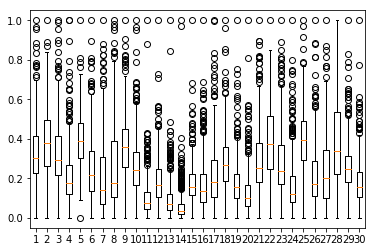

In [7]:
# 균등 비율
X_max = X_train.max(axis=0)
X_min = X_train.min(axis=0)
X_train_uni = (X_train - X_min) / (X_max - X_min)
X_test_uni = (X_test - X_min) / (X_max - X_min) # 학습데이터 값을 기준으로 변환

plt.boxplot(X_train_uni)
print('')

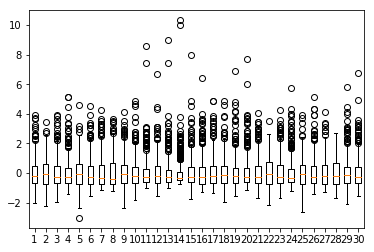

In [8]:
# 정규분포
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std # 학습데이터 값을 기준으로 변환

plt.boxplot(X_train_norm)
print('')

In [9]:
model = SVC()
model.fit(X_train_uni, y_train)

train_score = model.score(X_train_uni, y_train)
test_score = model.score(X_test_uni, y_test)
display(train_score, test_score)

0.9483568075117371

0.958041958041958

In [10]:
model = SVC()
model.fit(X_train_norm, y_train)

train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
display(train_score, test_score)

0.9835680751173709

0.972027972027972

- 이제 SVC 의 중요 옵션인 C 와 gamma 값을 바꿔가며 적용해 보자.
- C 와 gamma 는 값이 커질수록 훈련데이터에 맞추는 경향이 있다.

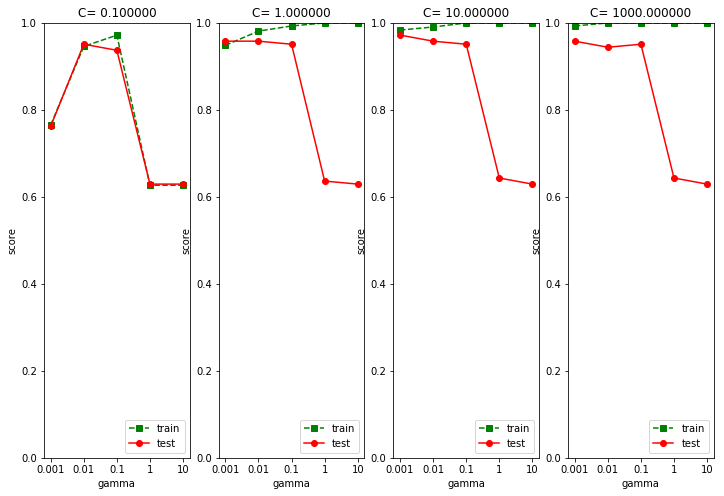

In [11]:
C=[0.1,1,10,1000]
gamma=[0.001,0.01,0.1,1,10]
s_train=[]
s_test=[]

for c in C:
    s1=[]
    s2=[]
    
    for g in gamma:
        model=SVC(C=c,gamma=g)
        model.fit(X_train_norm,y_train)

        pred_y=model.predict(X_test_norm)
        s1.append(model.score(X_train_norm,y_train))
        s2.append(model.score(X_test_norm,y_test))
        
    s_train.append(s1)
    s_test.append(s2)
    
fig=figure(figsize=[12,8])
for i in range(len(C)):
    plt.subplot(1,len(C),i+1)
    plt.plot(s_train[i],'gs--',label='train')
    plt.plot(s_test[i],'ro-',label='test')
    plt.title('C= %f' % (C[i]))
    plt.xticks(range(len(gamma)),gamma)
    plt.ylim(0,1)
    plt.xlabel('gamma')
    plt.ylabel('score')
    plt.legend(loc='lower right')

- 마지막으로, 시각화를 위해 속성 2개를 선택해 SVC 를 적용해 보겠습니다.

0.9014084507042254

0.9090909090909091

Text(0.5,1,'SVM - decision bounds')

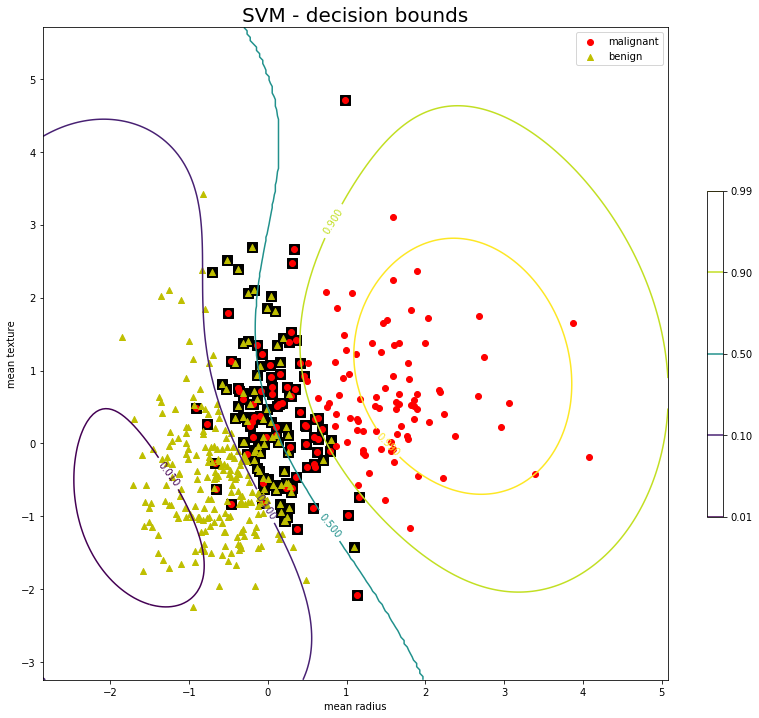

In [12]:
col1 = 0 #20
col2 = 1 #27

X = cancer.data[:,[col1,col2]]
y = cancer.target

X_train,X_test,y_train,y_test = train_test_split(X, y)

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_norm = (X_train-X_mean)/X_std
X_test_norm = (X_test-X_mean)/X_std

model = SVC(C=1, gamma=0.1, probability=True) # 확률 점수를 얻기 위해 probability=True
model.fit(X_train_norm, y_train)

# 점수를 출력
train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
display(train_score, test_score)

# fit() 결과를 등고선으로 나타낸다
xmax = X_train_norm[:,0].max()+1
xmin = X_train_norm[:,0].min()-1
ymax = X_train_norm[:,1].max()+1
ymin = X_train_norm[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.5, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X_train_norm[:,0][y_train==0],X_train_norm[:,1][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_norm[:,0][y_train==1],X_train_norm[:,1][y_train==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])
plt.title('SVM - decision bounds',fontsize=20)

In [13]:
display(sv.shape, sv[:10])

(135, 2)

array([[ 0.49684469, -0.32077007],
       [-0.90639651,  0.49230345],
       [-0.13359701,  1.34532566],
       [ 0.4736026 ,  0.24791141],
       [ 0.11044494,  0.2267621 ],
       [-0.19460749,  0.2972598 ],
       [ 0.63048671, -0.1139768 ],
       [ 0.30509745, -0.60511081],
       [ 0.35158163,  0.74139533],
       [ 0.04362393,  0.9082399 ]])

In [14]:
model.predict_proba([[0,0]])

array([[0.33490442, 0.66509558]])